# LSTM (Long Short Term Memory)

### introduction

- this is the updated version of rnn

- it solve the gradient vashing and gradient exploding problems.

- it introduces gating mechanisms (input gate, forget gate, output gate) to control the flow of information
- these gates allow the network to selectively remember or forget information over long sequences
- LSTMs can capture long-term dependencies more effectively than traditional RNNs
- they are widely used in various sequence modeling tasks like language modeling, machine translation, and speech recognition

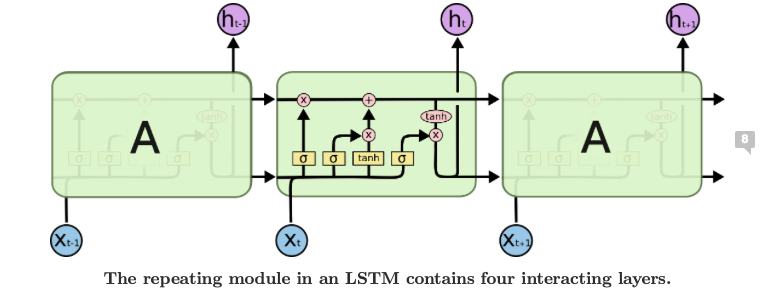

### how they work internally ?
 
1. input gate: decides which takes the input for cell
   - uses sigmoid activation to output values between 0 and 1
   - decides which values to update

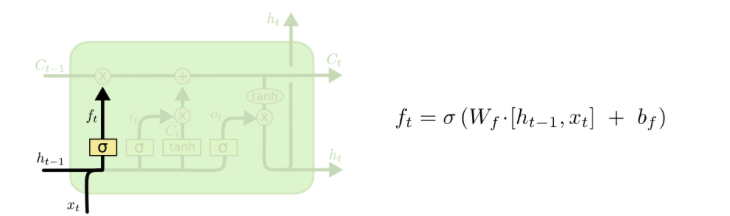


2. forget gate: decides what informantion should get removed from the cell 
    - also uses sigmoid activation
    - outputs values close to 0 (forget) or 1 (keep)

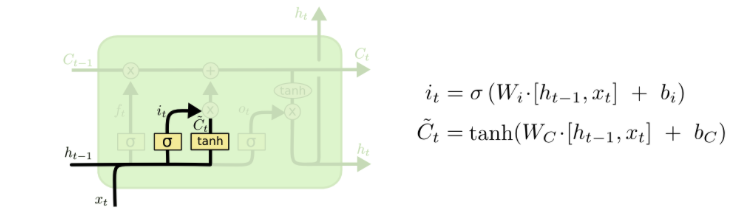

3. cell state update: combines the forget gate and input gate outputs
   - multiplies the old cell state by the forget gate output
   - adds the input gate output multiplied by a candidate cell state

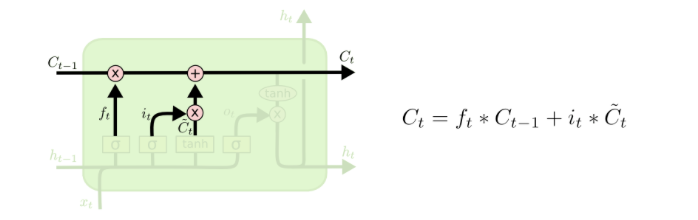

4. output gate: 
   - uses sigmoid activation
   - filters the updated cell state to produce the final output

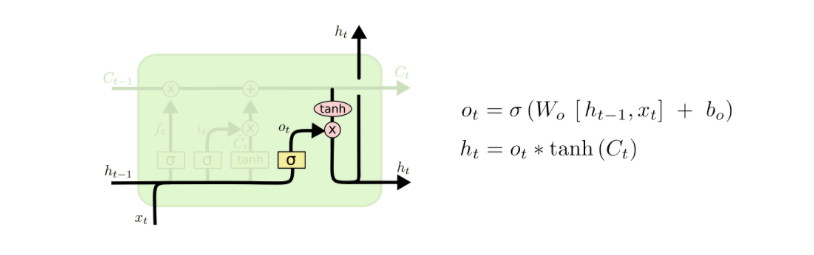

5. final output: combines the output gate with the updated cell state
   - the cell state is passed through a tanh function and multiplied by the output gate

this architecture allows LSTMs to maintain relevant information over long sequences,
selectively update or forget information, and produce relevant outputs at each time step.


